## 데이터 컬럼 설명
- PassengerId : 각 승객의 고유 ID. 각 Id는 승객이 함께 여행하는 그룹을 나타내고 gggg_pp그룹 내의 번호를 나타내는 형식을 취합니다 . 그룹의 사람들은 종종 가족 구성원이지만 항상 그런 것은 아닙니다.
- HomePlanet : 승객이 출발한 행성으로, 일반적으로 승객이 거주하는 행성입니다.
- CryoSleep : 승객이 항해 기간 동안 냉동수면 여부. cryosleep의 승객은 객실에 갇혀 있습니다.
- Cabin : 승객이 머무르는 캐빈 번호. 형식을 취합니다 deck/num/side. 여기 에서 Port 또는 Starboard 가 side될 수 있습니다 .PS
- Destination : 승객이 내릴 행성.
- Age : 승객의 나이.
- VIP : 승객이 항해 중 특별 VIP 서비스 비용을 지불했는지 여부.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck : 승객이 다양한 고급 편의 시설 각각에 대해 청구한 금액입니다.
- Name : 승객의 성과 이름.
- Transported : 승객이 다른 차원으로 이동했는지 여부. 이것은 목표, 예측하려는 열입니다.

## 1.데이터 살펴보기

In [2]:
import pandas as pd
spaceship_train = pd.read_csv("/data/cuai/train.csv")
spaceship_train.head(4)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False


In [3]:
spaceship_test = pd.read_csv("/data/cuai/test.csv")
spaceship_test.head(4)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter


In [5]:
# 데이터 결측치 확인
train_na = (spaceship_train.isna().sum().to_frame()
               .T          # 전치
               .rename(index={0:'Missing values'})) # 행 이름

test_na = (spaceship_test.isna().sum().to_frame().T.rename(index={0:'Missing values'}))

# stacking the two missing value tables & plotting them
check_na = pd.concat([train_na, test_na])
check_na

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
Missing values,0,201,217,199,182,179,203,181,183,208,183,188,200,0.0
Missing values,0,87,93,100,92,91,93,82,106,98,101,80,94,NaN


### 결측치를 채우기 위해 빈도수 확인

In [6]:
spaceship_train['HomePlanet'].value_counts(normalize=True)

Earth     0.541922
Europa    0.250942
Mars      0.207136
Name: HomePlanet, dtype: float64

In [7]:
spaceship_train['Cabin'].str[:1].value_counts(normalize=True)

F    0.328938
G    0.301271
E    0.103132
B    0.091712
C    0.087944
D    0.056275
A    0.030139
T    0.000589
Name: Cabin, dtype: float64

In [8]:
spaceship_train['Cabin'].str[-1:].value_counts(normalize=True)

S    0.504827
P    0.495173
Name: Cabin, dtype: float64

## 2. 데이터 정제

### 결측치 처리

In [9]:
#소비금액의 결측치는 0원
spaceship_train['RoomService'].fillna(0, inplace=True)
spaceship_train['FoodCourt'].fillna(0, inplace=True)
spaceship_train['ShoppingMall'].fillna(0, inplace=True)
spaceship_train['Spa'].fillna(0, inplace=True)
spaceship_train['VRDeck'].fillna(0, inplace=True)

spaceship_test['RoomService'].fillna(0, inplace=True)
spaceship_test['FoodCourt'].fillna(0, inplace=True)
spaceship_test['ShoppingMall'].fillna(0, inplace=True)
spaceship_test['Spa'].fillna(0, inplace=True)
spaceship_test['VRDeck'].fillna(0, inplace=True)

In [10]:
#합계금 컬럼생성
spaceship_train['TotalBill'] = spaceship_train['RoomService'] + spaceship_train['FoodCourt'] + spaceship_train['ShoppingMall'] \
                      + spaceship_train['Spa'] + spaceship_train['VRDeck']

spaceship_test['TotalBill'] = spaceship_test['RoomService'] + spaceship_test['FoodCourt'] + spaceship_test['ShoppingMall'] \
                      + spaceship_test['Spa'] + spaceship_test['VRDeck']

In [11]:
# CryoSleep의 결측값은 TotalBill이 0이면 참, 0보다 크면 거짓
spaceship_train.loc[(spaceship_train['CryoSleep'].isna()) &  (spaceship_train['TotalBill']==0), 'CryoSleep'] = True
spaceship_train.loc[(spaceship_train['CryoSleep'].isna()) &  (spaceship_train['TotalBill']>0),  'CryoSleep'] = False

spaceship_test.loc[(spaceship_test['CryoSleep'].isna()) &  (spaceship_test['TotalBill']==0), 'CryoSleep'] = True
spaceship_test.loc[(spaceship_test['CryoSleep'].isna()) &  (spaceship_test['TotalBill']>0),  'CryoSleep'] = False

In [19]:
#고향별과 도착지는 결측치의 경우 Unknown으로 표시
spaceship_train.loc[(spaceship_train['HomePlanet'].isna()), 'HomePlanet'] = "UnknownHome"
spaceship_test.loc[(spaceship_test['HomePlanet'].isna()), 'HomePlanet'] = "UnknownHome"

spaceship_train.loc[(spaceship_train['Destination'].isna()), 'Destination'] = "UnknownDes"
spaceship_test.loc[(spaceship_test['Destination'].isna()), 'Destination'] = "UnknownDes"

In [13]:
#객실 결측치 채우기
# Capin 무작위 대체
import numpy as np
train_rand_cabin = []
test_rand_cabin = []

np.random.seed(42)

#빈도대로 결측치를 채운다
for i in range(len(spaceship_train['Cabin'][spaceship_train['Cabin'].isna()])):
    _ = f"""{np.random.choice(['F', 'G', 'E', 'B', 'C', 'D', 'A', 'T'], 
           p=[0.328938, 0.301271, 0.103132, 0.091712, 0.087944, 0.056275, 0.030139, 0.000589])} \
           /{np.random.randint(0, 1894)}/{np.random.choice(['S', 'P'], p=[0.504827, 0.495173])}"""
    train_rand_cabin.append(_)

for i in range(len(spaceship_test['Cabin'][spaceship_test['Cabin'].isna()])):
    _ = f"""{np.random.choice(['F', 'G', 'E', 'B', 'C', 'D', 'A', 'T'],
           p=[0.328938, 0.301271, 0.103132, 0.091712, 0.087944, 0.056275, 0.030139, 0.000589])}\ 
           /{np.random.randint(0, 1894)}/{np.random.choice(['S', 'P'], p=[0.504827, 0.495173])}"""
    test_rand_cabin.append(_)
    
    
# 랜덤으로 NA 채우기
spaceship_train.loc[spaceship_train['Cabin'].isna(), 'Cabin'] = train_rand_cabin
spaceship_test.loc[spaceship_test['Cabin'].isna(), 'Cabin'] = test_rand_cabin

# Cabin 컬럼 분리
spaceship_train_split = spaceship_train['Cabin'].str.split('/', expand=True).rename(columns={0: 'Cabin_deck', 1: 'Cabin_num', 2: 'Cabin_side'})
spaceship_test_split = spaceship_test['Cabin'].str.split('/', expand=True).rename(columns={0: 'Cabin_deck', 1: 'Cabin_num', 2: 'Cabin_side'})

# 컬럼 병합
spaceship_train = pd.concat([spaceship_train, spaceship_train_split], axis=1)
spaceship_test = pd.concat([spaceship_test, spaceship_test_split], axis=1)

In [14]:
#age 결측치는 평균으로 채운다
spaceship_train = spaceship_train.fillna(value={'Age':spaceship_train.Age.mean()})
spaceship_test = spaceship_test.fillna(value={'Age':spaceship_test.Age.mean()})

# 사용금액이 0이면 VIP가 아님
spaceship_train.loc[(spaceship_train.TotalBill==0)&(spaceship_train.VIP.isna()), 'VIP'] = False
spaceship_test.loc[(spaceship_test.TotalBill==0)&(spaceship_test.VIP.isna()), 'VIP'] = False

# 사용금액이 1000보다 크면 VIP, 작으면 아님
spaceship_train.loc[(spaceship_train.VIP.isna())&(spaceship_train.TotalBill>1000), 'VIP'] = True
spaceship_train.loc[(spaceship_train.VIP.isna()), 'VIP'] = False

spaceship_test.loc[(spaceship_test.VIP.isna())&(spaceship_test.TotalBill>1000), 'VIP'] = True
spaceship_test.loc[(spaceship_test.VIP.isna()), 'VIP'] = False

# 이름 열 제거
spaceship_train.drop(columns=['Name'], inplace=True)
spaceship_test.drop(columns=['Name'], inplace=True)

In [15]:
#승객 그룹, 번호 분리
spaceship_train['GroupID'] = spaceship_train['PassengerId'].str[:4]
spaceship_train['NumberID'] = spaceship_train['PassengerId'].str[5:]

spaceship_test['GroupID'] = spaceship_test['PassengerId'].str[:4]
spaceship_test['NumberID'] = spaceship_test['PassengerId'].str[5:]

In [16]:
# 데이터타입 형변환
spaceship_train.GroupID = spaceship_train.GroupID.astype('int')
spaceship_train.NumberID = spaceship_train.NumberID.astype('int')

spaceship_test.GroupID = spaceship_test.GroupID.astype('int')
spaceship_test.NumberID = spaceship_test.NumberID.astype('int')

spaceship_train.Cabin_num = spaceship_train.Cabin_num.astype('int')
spaceship_test.Cabin_num = spaceship_test.Cabin_num.astype('int')

In [20]:
# 데이터 결측치 확인
train_na = (spaceship_train.isna().sum().to_frame().T.rename(index={0:'Missing values'})) # 행 이름

test_na = (spaceship_test.isna().sum().to_frame().T.rename(index={0:'Missing values'}))

pd.concat([train_na, test_na])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalBill,Cabin_deck,Cabin_num,Cabin_side,GroupID,NumberID
Missing values,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0
Missing values,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0


### 정제가 된 후의 데이터 저장

In [21]:
spaceship_train.to_csv("/data/spaceship_train_2.csv")
spaceship_test.to_csv("/data/spaceship_test_2.csv")

### 정제데이터 가져오기

In [22]:
import pandas as pd
spaceship_train=pd.read_csv("/data/spaceship_train.csv")
spaceship_test=pd.read_csv("/data/spaceship_test.csv")

In [23]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

#한글폰트 가져오기
plt.rcParams['axes.unicode_minus']=False

path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

## 3. 탐색적 데이터 분석

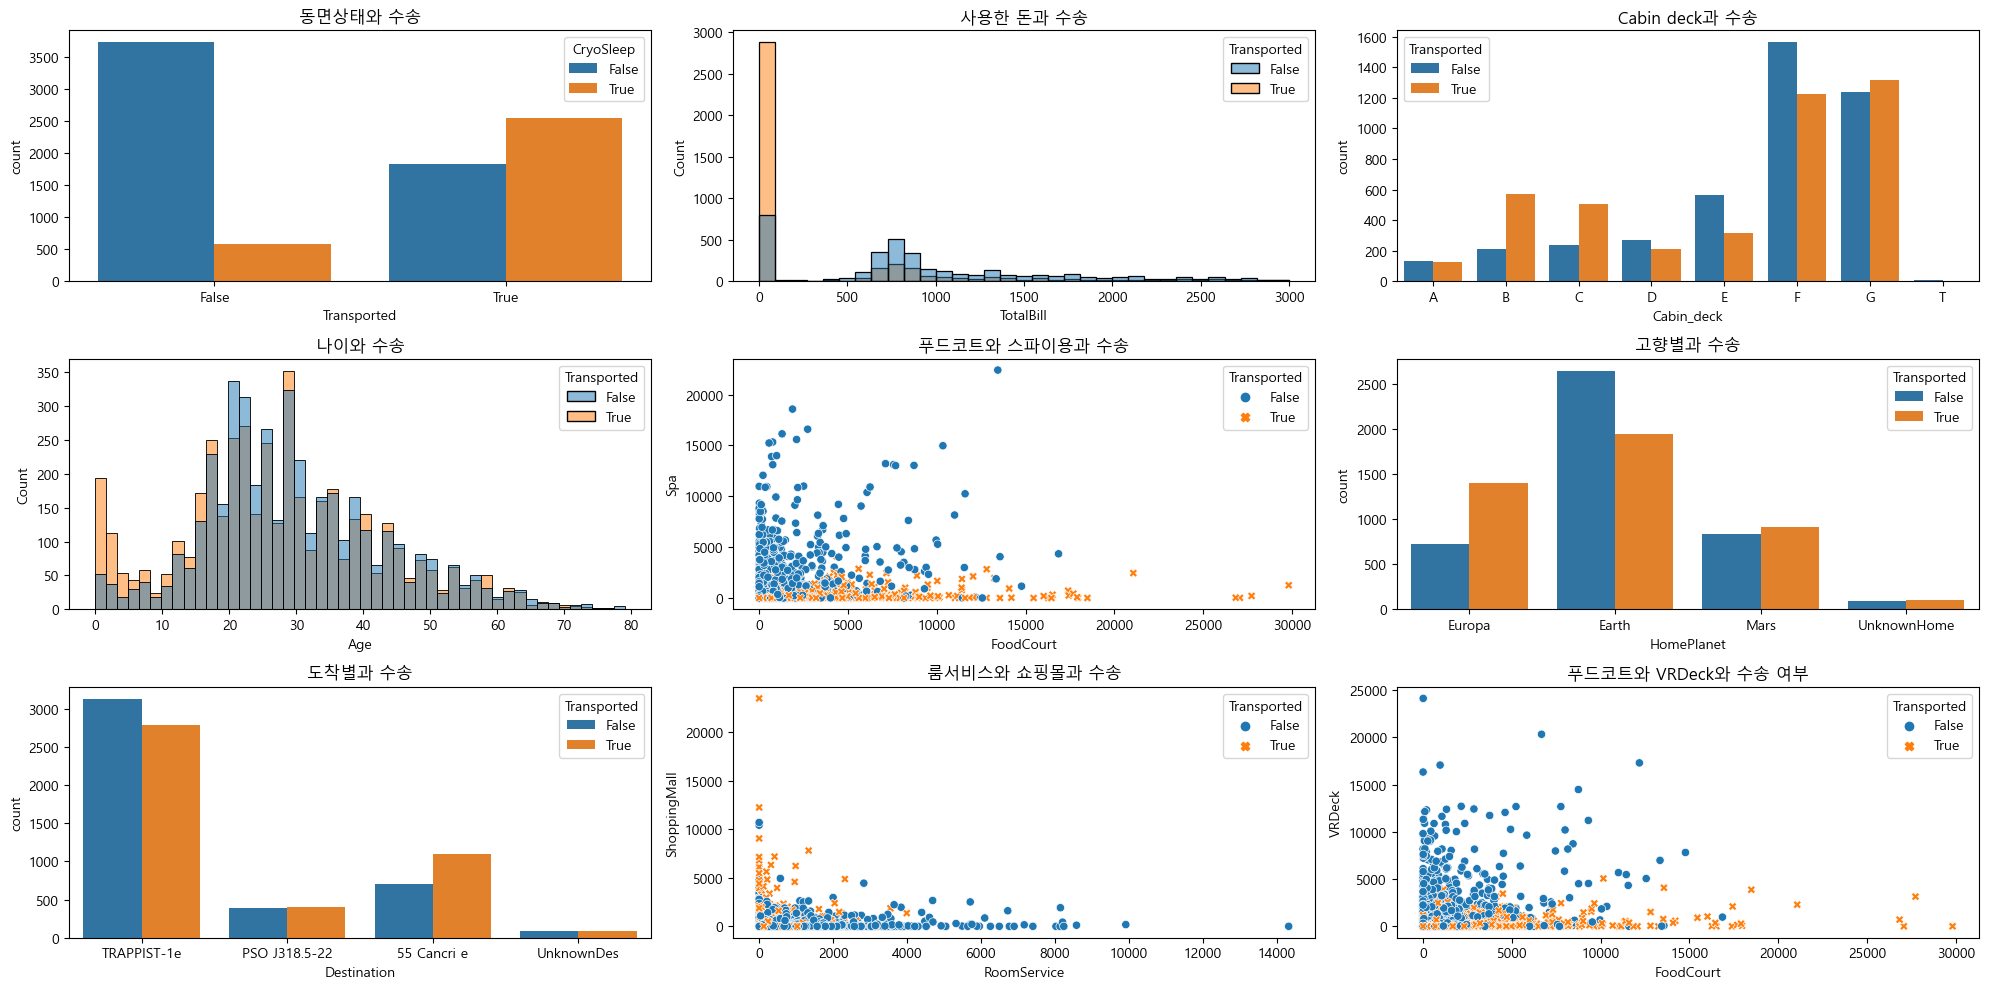

In [24]:
import seaborn as sns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

#동면상태에 따른 수송 여부
sns.countplot(data=spaceship_train, x='Transported', hue='CryoSleep', ax=axes[0, 0])
axes[0,0].set_title('동면상태와 수송')

#사용한 돈과 수송여부
sns.histplot(data=spaceship_train.query('TotalBill < 3000'), x='TotalBill', hue='Transported', ax=axes[0, 1])
axes[0,1].set_title('사용한 돈과 수송')

#Cabin에 deck 따른 수송여부
sns.countplot(data=spaceship_train, x='Cabin_deck', hue='Transported', 
              order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], ax=axes[0, 2])
axes[0,2].set_title('Cabin deck과 수송')

#나이별 수송여부
sns.histplot(data=spaceship_train, x='Age', hue='Transported', ax=axes[1, 0])
axes[1,0].set_title('나이와 수송')

#푸드코트와 스파이용과 수송
sns.scatterplot(data=spaceship_train, hue='Transported',x='FoodCourt', y='Spa', style='Transported', ax=axes[1, 1])
axes[1,1].set_title('푸드코트와 스파이용과 수송')

#고향과 수송
sns.countplot(data=spaceship_train, x='HomePlanet', hue='Transported', ax=axes[1, 2])
axes[1,2].set_title('고향별과 수송')

#도착과 수송
sns.countplot(data=spaceship_train, x='Destination', hue='Transported', ax=axes[2,0])
axes[2,0].set_title('도착별과 수송')

#룸서비스와 쇼핑몰과 수송
sns.scatterplot(data=spaceship_train, hue='Transported', x='RoomService', y='ShoppingMall', style='Transported', ax=axes[2,1])
axes[2,1].set_title('룸서비스와 쇼핑몰과 수송')

#VIP와 수송 여부
sns.scatterplot(data=spaceship_train, hue='Transported', x='FoodCourt', y='VRDeck', style='Transported', ax=axes[2,2])
axes[2,2].set_title('푸드코트와 VRDeck와 수송 여부')
                                                                              
plt.tight_layout()  # Adjust the spacing between subplots

plt.show()

### 시사점
- 동면을 할수록 수송확률↑
- 사용한 돈이 없을수록 수송확률↑
- deck B,C,G가 수송확률이 높음. 특히 E,F는 수송 안될 확률이 높음
- 나이가 어릴수록 확률↑
- 음식값을 많이 쓸수록 확률↑ 
- Europa와 Mars가 확률↑, 지구는 확률↓
- 고향을 모르는 경우에는 반반
- 55 Cancri e로 가는 승객들이 수송확률↑ 
- 룸서비스를 많이 시킬수록 수송확률 ↓
- 룸서비스를 적게하고 쇼핑을 많이하면 확률↑ 
- VIP 여부와는 상관관계가 적음

- 동면을 하고 deck B,C,G를 이용하며, 나이가 어리고 Europa나 Mars에서 55 Cancri e로 가는 손님이 가장 확률이 높음
- 동면을 하지 않는다면 spa, Roomservice, VRDeck 를 이용할수록 수송확률이 낮음

## 4. 데이터 예측

In [26]:
# 상관관계가 높은 두 컬럼을 더미로 변환

import numpy as np
# 돈 사용 여부
spaceship_train = spaceship_train.assign(Spent=np.where(spaceship_train.TotalBill > 0, 'Spender', 'Non_Spender'))
spaceship_test = spaceship_test.assign(Spent=np.where(spaceship_test.TotalBill > 0, 'Spender', 'Non_Spender'))

# 룸서비스와 스파, 데크 비율
spaceship_train = spaceship_train.assign(RSVR=lambda df: ((df['RoomService']+df['Spa']+df['VRDeck'])/df['TotalBill']).fillna(0))
spaceship_test = spaceship_test.assign(RSVR=lambda df: ((df['RoomService']+df['Spa']+df['VRDeck'])/df['TotalBill']).fillna(0))

# Mars나 Europa의 돈 사용 여부
#사용한 돈이 없고 Earth가 아니면 1, 아니면 0
spaceship_train = spaceship_train.assign(EurMar_no_spend=lambda df: np.where((df['TotalBill']==0) & (df['HomePlanet']!='Earth'), 1, 0))
spaceship_test = spaceship_test.assign(EurMar_no_spend=lambda df: np.where((df['TotalBill']==0) & (df['HomePlanet']!='Earth'), 1, 0))

# 동면과 돈사용 관계

#동면한 사람 중 사용한 돈이 없는 사람
spaceship_train = spaceship_train.assign(Cryo_no_spend=lambda df: np.where((df['TotalBill']==0) & (df['CryoSleep']==True), 1, 0))
spaceship_test = spaceship_test.assign(Cryo_no_spend=lambda df: np.where((df['TotalBill']==0) & (df['CryoSleep']==True), 1, 0))

# 동면하지 않은 사람 중 돈을 사용한 사람
spaceship_train = spaceship_train.assign(Cryo_spend=lambda df: np.where((df['TotalBill']>0) & (df['CryoSleep']==False), 1, 0))
spaceship_test = spaceship_test.assign(Cryo_spend=lambda df: np.where((df['TotalBill']>0) & (df['CryoSleep']==False), 1, 0))

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

gdb_train_X=spaceship_train[['RSVR','TotalBill','EurMar_no_spend', 'Cryo_no_spend', 'Cryo_spend']]
gdb_train_y=spaceship_train['Transported']
X_train, X_val, y_train, y_val = train_test_split(gdb_train_X, gdb_train_y, test_size=0.2, random_state=42)


In [37]:
clf = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_val, y_val)

0.78205865439908

In [38]:
#예측데이터 가져오기
gdb_test_X=spaceship_test[['RSVR','TotalBill','EurMar_no_spend', 'Cryo_no_spend', 'Cryo_spend']]
#예측
gdb_test_y=clf.predict(gdb_test_X)

In [39]:
Submission = pd.DataFrame(data={'PassengerId':spaceship_test.PassengerId, 'Transported':gdb_test_y})
Submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [40]:
Submission.to_csv('submission_2.csv', index=False)